In [162]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Łączenie zbiorów danych 

In [163]:
population = pd.read_csv('population.csv')
population.head()

,DATAFLOW,LAST UPDATE,freq,unit,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJAN(1.0),04/11/24 23:00:00,Annual,Number,Total,Total,Andorra,1986,44593,NaN
1,ESTAT:DEMO_PJAN(1.0),04/11/24 23:00:00,Annual,Number,Total,Total,Andorra,1987,46976,NaN
2,ESTAT:DEMO_PJAN(1.0),04/11/24 23:00:00,Annual,Number,Total,Total,Andorra,1988,48451,NaN
3,ESTAT:DEMO_PJAN(1.0),04/11/24 23:00:00,Annual,Number,Total,Total,Andorra,1989,50528,NaN
4,ESTAT:DEMO_PJAN(1.0),04/11/24 23:00:00,Annual,Number,Total,Total,Andorra,1990,50887,NaN


In [164]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     2480 non-null   object
 1   LAST UPDATE  2480 non-null   object
 2   freq         2480 non-null   object
 3   unit         2480 non-null   object
 4   age          2480 non-null   object
 5   sex          2480 non-null   object
 6   geo          2480 non-null   object
 7   TIME_PERIOD  2480 non-null   int64 
 8   OBS_VALUE    2480 non-null   int64 
 9   OBS_FLAG     75 non-null     object
dtypes: int64(2), object(8)
memory usage: 193.9+ KB


In [165]:
population = population.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'age', 'sex', 'OBS_FLAG'])
population = population.rename(columns={'geo': 'Country', 'OBS_VALUE': 'Population', 'TIME_PERIOD': 'Year'})
population.head()

,Country,Year,Population
0,Andorra,1986,44593
1,Andorra,1987,46976
2,Andorra,1988,48451
3,Andorra,1989,50528
4,Andorra,1990,50887


In [166]:
indicators = pd.read_csv('demographic_indicators.csv')
indicators.head()

,DATAFLOW,LAST UPDATE,freq,indic_de,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_GIND(1.0),08/11/24 23:00:00,Annual,Crude rate of net migration plus statistical a...,Andorra,2004,53.9,NaN
1,ESTAT:DEMO_GIND(1.0),08/11/24 23:00:00,Annual,Crude rate of net migration plus statistical a...,Andorra,2005,14.4,NaN
2,ESTAT:DEMO_GIND(1.0),08/11/24 23:00:00,Annual,Crude rate of net migration plus statistical a...,Andorra,2006,26.2,NaN
3,ESTAT:DEMO_GIND(1.0),08/11/24 23:00:00,Annual,Crude rate of net migration plus statistical a...,Andorra,2007,16.1,NaN
4,ESTAT:DEMO_GIND(1.0),08/11/24 23:00:00,Annual,Crude rate of net migration plus statistical a...,Andorra,2008,8.5,NaN


In [167]:
indicators = indicators.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'])
indicators = indicators.rename(columns={'geo': 'Country',  'TIME_PERIOD': 'Year'})
indicators.head()

,indic_de,Country,Year,OBS_VALUE
0,Crude rate of net migration plus statistical a...,Andorra,2004,53.9
1,Crude rate of net migration plus statistical a...,Andorra,2005,14.4
2,Crude rate of net migration plus statistical a...,Andorra,2006,26.2
3,Crude rate of net migration plus statistical a...,Andorra,2007,16.1
4,Crude rate of net migration plus statistical a...,Andorra,2008,8.5


In [168]:
indicators['indic_de'].unique()

array(['Crude rate of net migration plus statistical adjustment',
       'Crude birth rate', 'Crude death rate'], dtype=object)

In [169]:
# Przekształcenie DataFrame za pomocą pivot
indicators_pivot = indicators.pivot(index=['Year', 'Country'], columns='indic_de', values='OBS_VALUE').reset_index()

indicators_pivot.columns.name = None  

indicators_pivot.head()

,Year,Country,Crude birth rate,Crude death rate,Crude rate of net migration plus statistical adjustment
0,1960,Albania,43.3,10.4,-1.8
1,1960,Austria,17.9,12.7,-0.3
2,1960,Belgium,16.8,12.4,1.0
3,1960,Bosnia and Herzegovina,34.1,10.3,-7.4
4,1960,Bulgaria,17.8,8.1,0.0


In [170]:
# Połączenie danych demograficznych (population) z przekształconymi wskaźnikami (indicators_pivot)
# Operacja zachowuje wszystkie rekordy z tabeli population, łącząc dane na podstawie kolumn Year i Country
merged_df = population.merge(indicators_pivot, on=['Year', 'Country'], how='left')

# Zapisanie połączonego DataFrame do pliku CSV w celu dalszej analizy
merged_df.to_csv('merged_data.csv', index=False)

data = merged_df

In [171]:
# Ujednolicenie i skrócenie nazw kolumn
data.columns = [
    'country',
    'year',
    'population',
    'birth_rate',
    'death_rate',
    'net_migration_rate'
]

# Podgląd danych po zmianie nazw kolumn
print("Zmienione nazwy kolumn:")
print(data.columns)

data.head()

Zmienione nazwy kolumn:
Index(['country', 'year', 'population', 'birth_rate', 'death_rate',
       'net_migration_rate'],
      dtype='object')


,country,year,population,birth_rate,death_rate,net_migration_rate
0,Andorra,1986,44593,11.9,NaN,NaN
1,Andorra,1987,46976,11.0,NaN,NaN
2,Andorra,1988,48451,11.6,NaN,NaN
3,Andorra,1989,50528,12.5,NaN,NaN
4,Andorra,1990,50887,11.9,NaN,NaN


In [172]:
# Filtrowanie danych dla Polski i Hiszpanii
selected_countries = ['Poland', 'Denmark']
data = data[data['country'].isin(selected_countries)]

# Podgląd przefiltrowanych danych
print("Dane po przefiltrowaniu (Polska i Dania):")
display(data.head())


Dane po przefiltrowaniu (Polska i Dania):


,country,year,population,birth_rate,death_rate,net_migration_rate
652,Denmark,1960,4565455,16.6,9.5,-0.9
653,Denmark,1961,4593750,16.6,9.4,0.6
654,Denmark,1962,4629624,16.7,9.8,0.8
655,Denmark,1963,4665829,17.6,9.8,0.1
656,Denmark,1964,4703136,17.7,9.9,0.3


In [173]:
data.to_csv('prepared_data.csv', index=False)

### Przygotowanie danych 

#### Analiza brakujących danych 

In [174]:
# 1. Obliczenie liczby brakujących wartości i ich procentowego udziału dla każdej kolumny
missing_count = data.isnull().sum()  
missing_percent = (missing_count / len(data)) * 100  

# 2. Utworzenie DataFrame z podsumowaniem brakujących danych
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_count,  
    'Percentage': missing_percent     
})

# 3. Wyświetlenie podsumowania brakujących danych w przejrzystej formie
missing_data_summary


,Missing Values,Percentage
country,0,0.0
year,0,0.0
population,0,0.0
birth_rate,0,0.0
death_rate,0,0.0
net_migration_rate,0,0.0


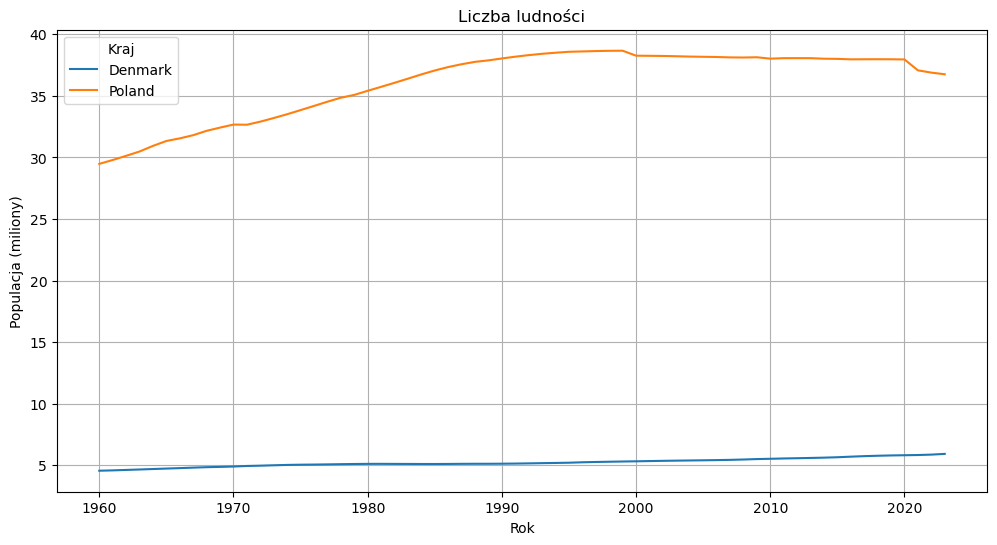

In [176]:
data = data.copy()

# Skalowanie populacji do milionów
data['population_millions'] = data['population'] / 1e6

# Wykres populacji w milionach
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='population_millions', hue='country')
plt.title("Liczba ludności")
plt.xlabel("Rok")
plt.ylabel("Populacja (miliony)")
plt.legend(title="Kraj")
plt.grid()
plt.show()


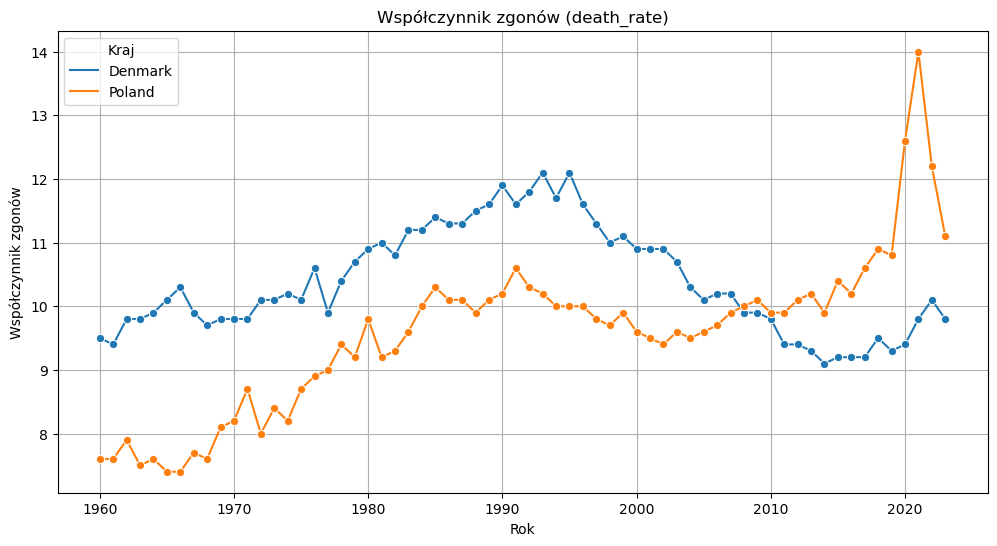

In [177]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='death_rate', hue='country', marker='o')
plt.title("Współczynnik zgonów (death_rate)")
plt.xlabel("Rok")
plt.ylabel("Współczynnik zgonów")
plt.legend(title="Kraj")
plt.grid()
plt.show()


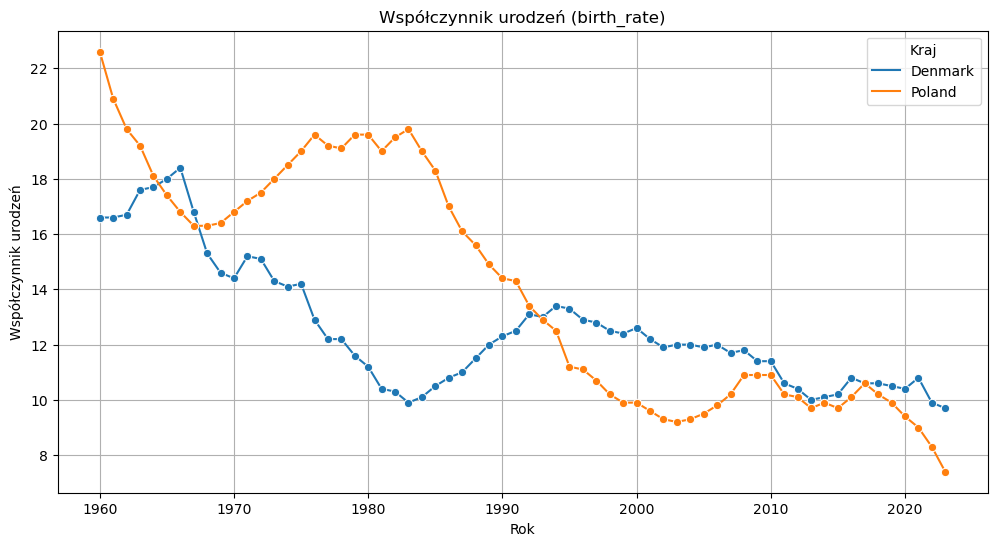

In [178]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='birth_rate', hue='country', marker='o')
plt.title("Współczynnik urodzeń (birth_rate)")
plt.xlabel("Rok")
plt.ylabel("Współczynnik urodzeń")
plt.legend(title="Kraj")
plt.grid()
plt.show()


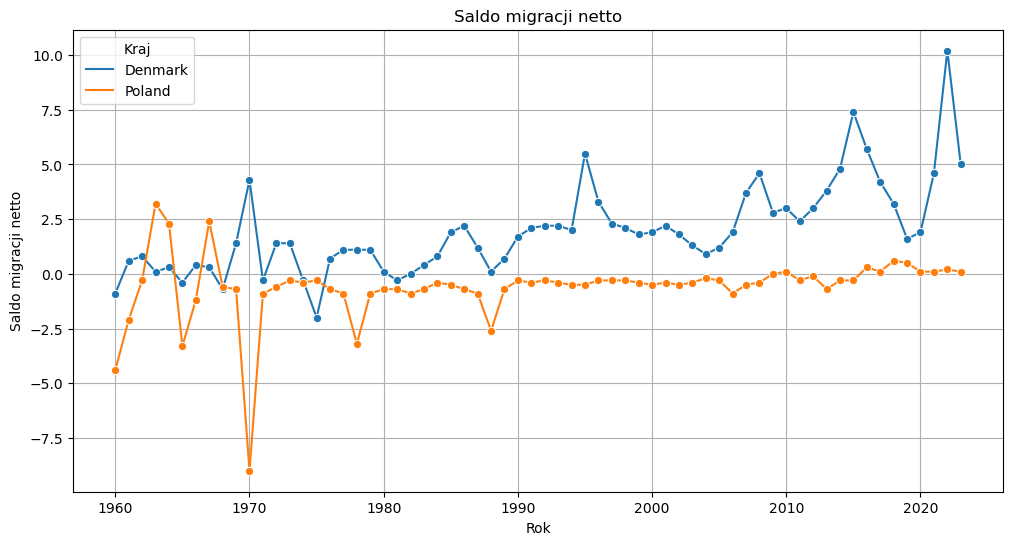

In [179]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='net_migration_rate', hue='country', marker='o')
plt.title("Saldo migracji netto")
plt.xlabel("Rok")
plt.ylabel("Saldo migracji netto")
plt.legend(title="Kraj")
plt.grid()
plt.show()


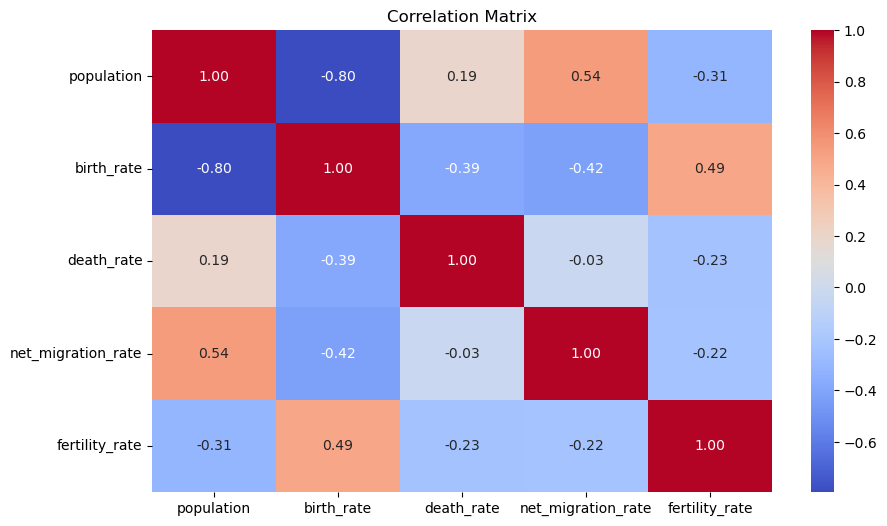

In [47]:
correlation_matrix = data[['population', 'birth_rate', 'death_rate', 'net_migration_rate', 'fertility_rate']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

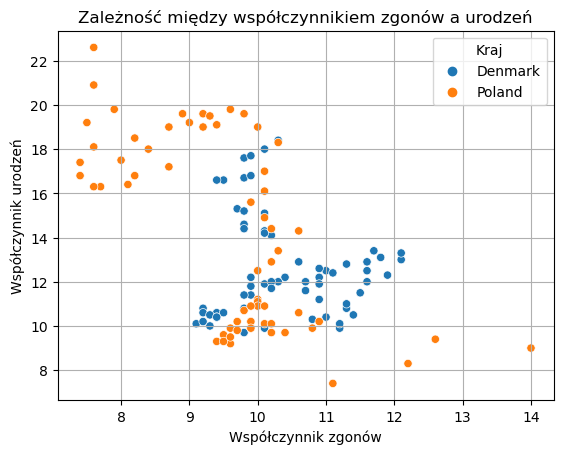

In [180]:
sns.scatterplot(data=data, x='death_rate', y='birth_rate', hue='country')
plt.title("Zależność między współczynnikiem zgonów a urodzeń")
plt.xlabel("Współczynnik zgonów")
plt.ylabel("Współczynnik urodzeń")
plt.legend(title="Kraj")
plt.grid()
plt.show()


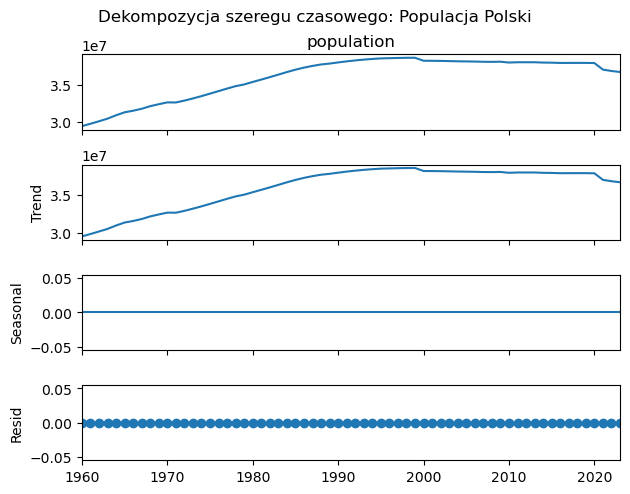

In [181]:
# ANALIZA SEZONOWOŚCI I TRENDÓW 

from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja szeregu czasowego dla populacji Polski
poland_data = data[data['country'] == 'Poland'].set_index('year')
decomposition = seasonal_decompose(poland_data['population'], model='additive', period=1)

# Wizualizacja dekompozycji
decomposition.plot()
plt.suptitle("Dekompozycja szeregu czasowego: Populacja Polski", y=1.02)
plt.show()


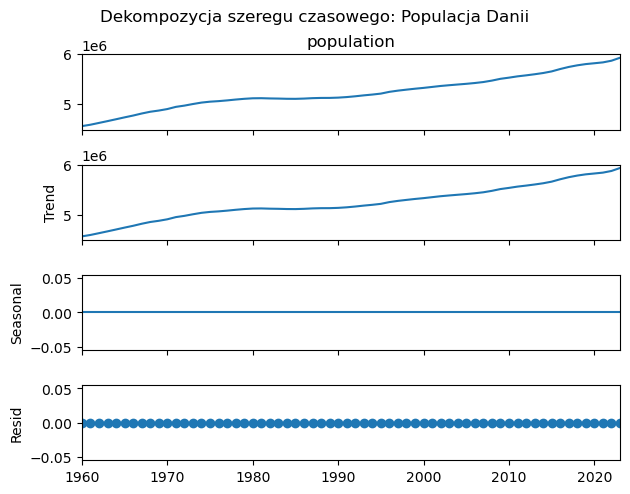

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja szeregu czasowego dla populacji Danii 
poland_data = data[data['country'] == 'Denmark'].set_index('year')
decomposition = seasonal_decompose(poland_data['population'], model='additive', period=1)

# Wizualizacja dekompozycji
decomposition.plot()
plt.suptitle("Dekompozycja szeregu czasowego: Populacja Danii", y=1.02)
plt.show()


/Users/emilia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


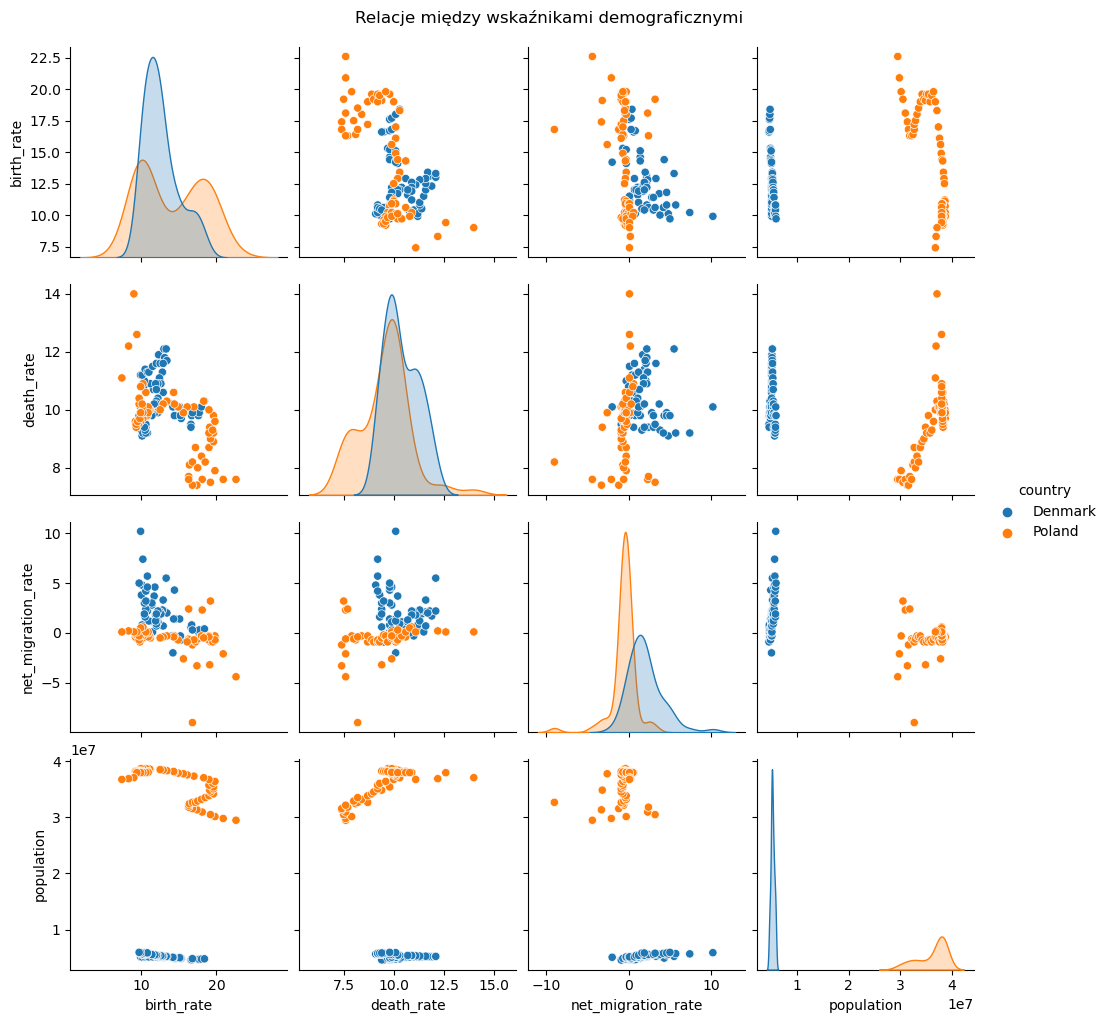

In [183]:
sns.pairplot(data, vars=['birth_rate', 'death_rate', 'net_migration_rate', 'population'], hue='country')
plt.suptitle("Relacje między wskaźnikami demograficznymi", y=1.02)
plt.show()


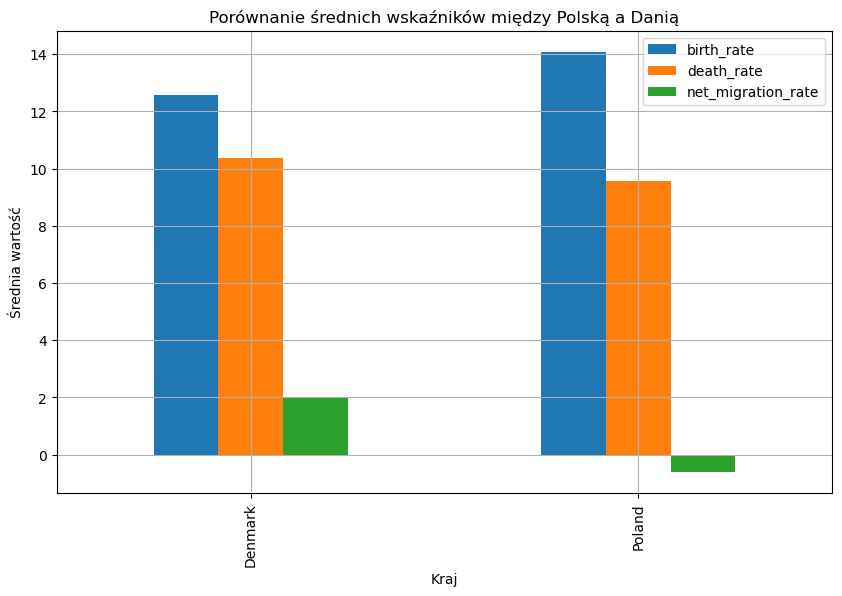

In [184]:
mean_values = data.groupby('country')[['birth_rate', 'death_rate', 'net_migration_rate']].mean().reset_index()

mean_values.plot(x='country', kind='bar', figsize=(10, 6))
plt.title("Porównanie średnich wskaźników między Polską a Danią")
plt.ylabel("Średnia wartość")
plt.xlabel("Kraj")
plt.grid()
plt.show()

